## I. About This Project

In this project, <b>I want to predict the Data from 100 sports image classification </b> from kaggle (https://www.kaggle.com/gpiosenka/sports-classification) using Convolutional Neural Networks (CNN). The dataset contains of collection of sports images covering 100 different sports.The Images are <b>[224,224,3]</b> jpg format. Data is <b>separated into train, test and valid directories.</b> 

For Related Libraries Documentations that I used in this project, you can access through this link :
- <b>Numpy</b> : https://numpy.org/
- <b>Pandas</b> : https://pandas.pydata.org/
- <b>Matplotlib</b> : https://matplotlib.org/
- <b>Tensorflow</b> : https://www.tensorflow.org/?hl=en
- <b>Keras</b> : https://keras.io/
- <b>Scikit-learn</b> : https://scikit-learn.org/stable/

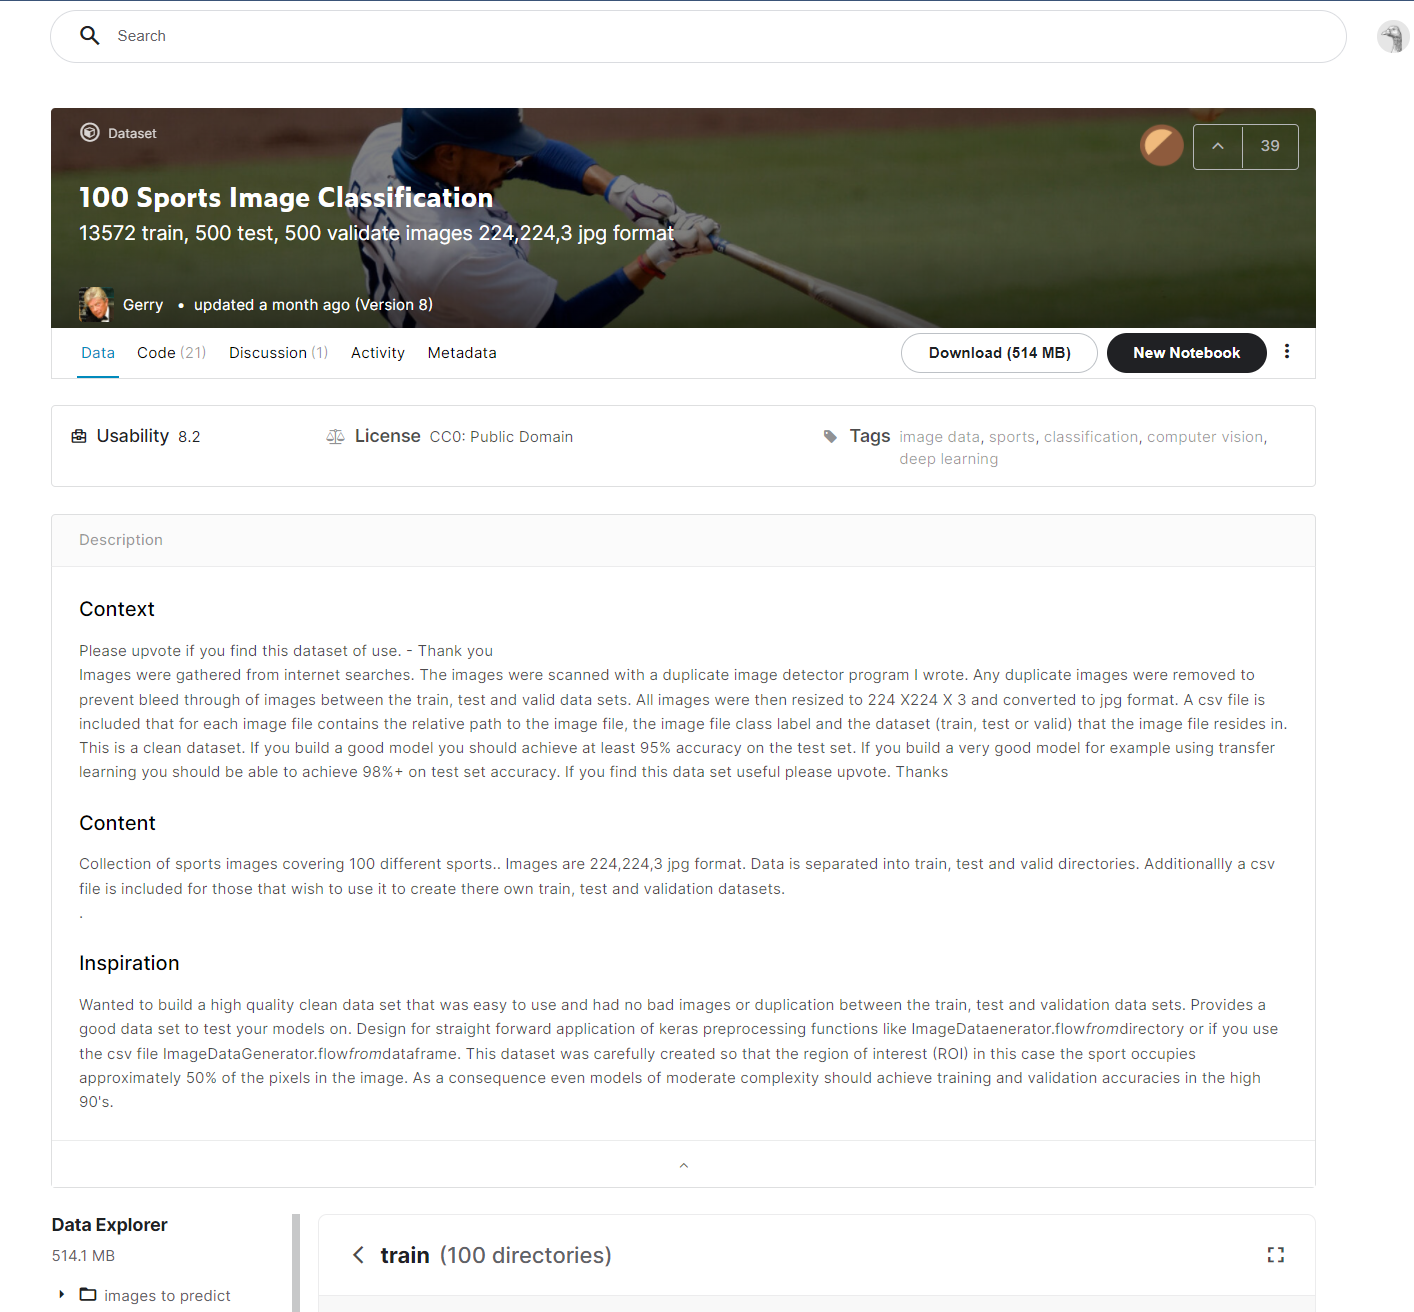

## II. What is CNN?

<img src = "https://miro.medium.com/max/1838/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" style = "width:600px;height:400px">

A Convolutional Neural Network (ConvNet/CNN) is <b>a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other</b>. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area. (source = https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 )

## III. How does it work?

Before we go to the working of CNN’s let’s cover the basics such as what is an image and how is it represented. An RGB image is nothing but a matrix of pixel values having three planes whereas a grayscale image is the same but it has a single plane. Take a look at this image to understand more. (source = https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/)

<img src = "https://editor.analyticsvidhya.com/uploads/306461_15yDvGKV47a0nkf5qLKOOQ.png">

For simplicity, let’s stick with grayscale images as we try to understand how CNNs work.

<img src = "https://editor.analyticsvidhya.com/uploads/750710_QS1ArBEUJjjySXhE.png" style = "width:600px;height:400px">

The above image shows what a convolution is. We take a filter/kernel(3×3 matrix) and apply it to the input image to get the convolved feature. This convolved feature is passed on to the next layer.

<img src = "https://editor.analyticsvidhya.com/uploads/419681_GcI7G-JLAQiEoCON7xFbhg.gif">

In the case of RGB color, channel take a look at this animation to understand its working

<img src = "https://editor.analyticsvidhya.com/uploads/556091_ciDgQEjViWLnCbmX-EeSrA.gif">

Convolutional neural networks are composed of multiple layers of artificial neurons. Artificial neurons, a rough imitation of their biological counterparts, are mathematical functions that calculate the weighted sum of multiple inputs and outputs an activation value. When you input an image in a ConvNet, each layer generates several activation functions that are passed on to the next layer.

The first layer usually extracts basic features such as horizontal or diagonal edges. This output is passed on to the next layer which detects more complex features such as corners or combinational edges. As we move deeper into the network it can identify even more complex features such as objects, faces, etc

<img src = "https://editor.analyticsvidhya.com/uploads/52794neural-networks-layers-visualization.jpg" style = "width:600px;height:600px" >

Based on the activation map of the final convolution layer, the classification layer outputs a set of confidence scores (values between 0 and 1) that specify how likely the image is to belong to a “class.” For instance, if you have a ConvNet that detects cats, dogs, and horses, the output of the final layer is the possibility that the input image contains any of those animals.

## IV. Plan of Attack

In this project, There are 3 Major Steps in order to get the result using CNN, which are :

- <b>Data Preparation and Exploration</b>
- <b>Train and Predict the Data using CNN Model with MobileNetV2</b>
- <b>Evaluate The Prediction using some Metrics</b>

### Step 1 : Data Preparation and Exploration

In This step, I Imported some libraries that necessary for the sake of training the data starting from numpy, pandas to Tensorflow and Keras. I also did the data exploration like scanning the characteristic of the dataset. and then <b> since the data is in the form of images</b>, we can't do the train_test_split like we used to do in Text data, so we use <b>ImageDataGenerator</b> to preprocessing the images. 

#### Part 1 : Import Libraries

I Imported some libraries that I need to explore and train the data, which are :
- <b>Numpy</b> : for working with arrays
- <b>Pandas</b> : for data manipulation and analysis
- <b>Matplotlib</b> : for visualizations
- <b>os</b> : provides functions for interacting with the operating system
- <b>glob</b> : return all file paths that match a specific pattern
- <b>PIL</b> : for opening, manipulating, and saving many different image file formats
- <b>Tensorflow</b> : for training our datasets with CNN models
- <b>Keras</b> : provides a Python interface for artificial neural networks
- <b>Scikit-learn</b> : for evaluate our model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob
from PIL import ImageFile

from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, log_loss, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import Callback, EarlyStopping

#### Part 2 : Define the directory

Define your dataset directory, in this case I save the variable into 3 variables, which are <b>train, test, and valid</b>. after that use <b>glob</b> to return all file paths that match a specific pattern and add the jpg format in behind the file.

In [2]:
train = 'datasets/train'
test = 'datasets/test'
valid = 'datasets/valid'

In [3]:
filepaths_train = list(glob.glob(train+'/**/*.jpg'))
filepaths_test = list(glob.glob(test+'/**/*.jpg'))

#### Part 3 : Create the Pandas Dataframes

Create the images dataset using <b>Pandas</b> for the data exploration, later on we are going to see the glimpse of our datasets

In [4]:
def proc_img(filepath):

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [5]:
train_df = proc_img(filepaths_train)
test_df = proc_img(filepaths_test)

In [6]:
print(f'Number of training pictures: {train_df.shape[0]}')
print(f'Number of test pictures: {test_df.shape[0]}')

Number of training pictures: 13572
Number of test pictures: 500


as you can see, there's a lot of images that we are going to train, about <b>13572 pictures!</b>. On the other hand we have the test images for about <b>500 pictures</b>.

#### Part 4 : Visualize the glimpse of our Train Dataset

We want to see the glimpse of our dataset that we want tp train, maybe this is like <b>head()</b> function in pandas. I used <b>plt.subplot</b> from <b>Matplotlib</b> to visualize it. dont forget to add the title based on the label on the directory. 

related documentation : 
- <b>plt.subplot</b> : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

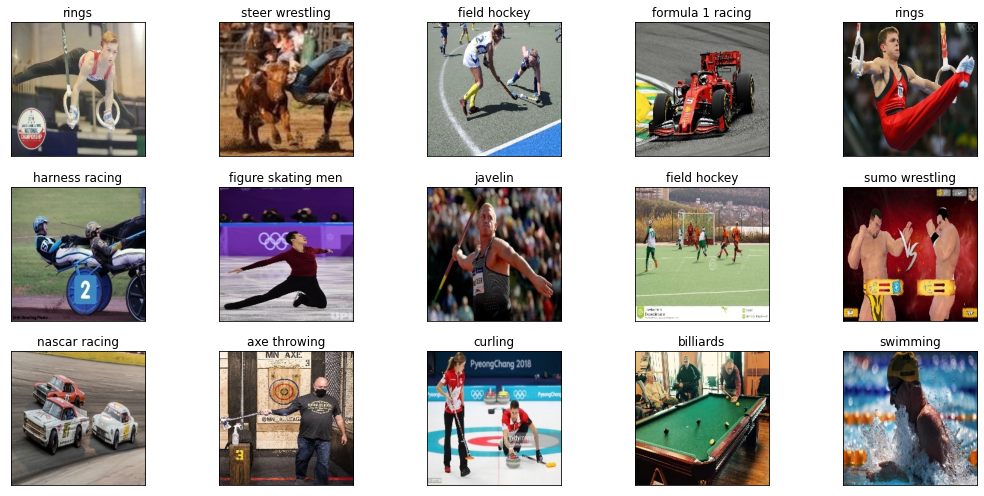

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[i]))
    ax.set_title(train_df.Label[i])
plt.tight_layout()
plt.show()

There's a lot of sports in there!. in fact, <b>in our dataset there are 100 type of sports!</b>. some of them are Basketball, Tennis, and even Sumo!

In [8]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

<b>This code fix an error, which would occur during the training otherwise</b>

#### Part 5 : Image Preprocessing

Same as we preprocess the tabular or text dataset, such like one hot encoding, feature scaling, and train test split, we also do some treatment to the Image Data, In this case I use <b>ImageDataGenerator</b>. Fyi that ImageDataGenerator has a lot of arguments, some of them are :

- <b>class_names</b> :  Used to control the order of the classes 
- <b>color_mode</b> :  One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.
- <b>batch_size</b> :  Size of the batches of data. Default: 32.
- <b>shuffle</b> : Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.
- <b>seed</b> : Optional random seed for shuffling and transformations.

you can see the other arguments for the sake of your perfect processing throught this link from <b>Keras Website</b> : https://keras.io/api/preprocessing/image/

In [9]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [10]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 10858 validated image filenames belonging to 100 classes.
Found 2714 validated image filenames belonging to 100 classes.
Found 500 validated image filenames belonging to 100 classes.


for about <b>10000+</b> images are validated to classes.

### Step 2 : Train and Predict the Data using CNN Model with MobileNetV2

#### Part 1 : What is MobileNetV2?

MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices.<b> It is based on an inverted residual structure where the residual connections are between the bottleneck layers</b>. The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers. (source = https://paperswithcode.com/method/mobilenetv2)

<img src = "https://1.bp.blogspot.com/-M8UvZJWNW4E/WsKk-tbzp8I/AAAAAAAAChw/OqxBVPbDygMIQWGug4ZnHNDvuyK5FBMcQCLcBGAs/s1600/image5.png" style = "width:600px;height:600px" >

#### Part 2 : What is Pretrained Model

A pre-trained model is <b>a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task</b>. You either use the pretrained model as is or use transfer learning to customize this model to a given task. source = (https://www.tensorflow.org/tutorials/images/transfer_learning)

#### Part 3 : Initiate, Build, and Train the CNN layers

after we preprocess the data, we make a pretrained model using <b>MobileNetV2</b>. This function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet. because the size of the image is 224, 224, 3 , I also use the same value for the <b>input_shape</b>

for related documentations you can access through this link :
- https://keras.io/api/applications/mobilenet/
- https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [11]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

We add the layers and specify the arguments inside it. As usual, I use <b>Rectifier</b> for the Activation function and for this time I use <b> Softmax</b> for the activation function in the output layers because it is good for multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels

for related documentations you can access through this link :
- https://machinelearningmastery.com/softmax-activation-function-with-python/
- https://towardsdatascience.com/softmax-function-simplified-714068bf8156

In [12]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(200, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(200, activation='relu')(x)

outputs = tf.keras.layers.Dense(100, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

after that, compile it. I use <b>categorical crossentopy</b> for the loss because the dataset contains more than two class labels

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

after we that we specify the <b>early stopping</b>. early stopping is used for <b>form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent</b>

In [14]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]

and then train the model, I used epochs for about <b>8</b>

In [15]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=8,
    callbacks = my_callbacks
)

Epoch 1/8
340/340 [==============================] - 248s 720ms/step - loss: 2.6375 - accuracy: 0.3995 - val_loss: 0.8323 - val_accuracy: 0.7524
Epoch 2/8
340/340 [==============================] - 243s 716ms/step - loss: 0.4710 - accuracy: 0.8663 - val_loss: 0.6484 - val_accuracy: 0.8132
Epoch 3/8
340/340 [==============================] - 247s 726ms/step - loss: 0.2531 - accuracy: 0.9266 - val_loss: 0.5995 - val_accuracy: 0.8217
Epoch 4/8
340/340 [==============================] - 244s 717ms/step - loss: 0.1410 - accuracy: 0.9604 - val_loss: 0.6384 - val_accuracy: 0.8290
Epoch 5/8
340/340 [==============================] - 243s 714ms/step - loss: 0.0856 - accuracy: 0.9791 - val_loss: 0.6669 - val_accuracy: 0.8242
Epoch 6/8
340/340 [==============================] - 243s 716ms/step - loss: 0.0605 - accuracy: 0.9861 - val_loss: 0.6808 - val_accuracy: 0.8265
Epoch 7/8
340/340 [==============================] - 245s 720ms/step - loss: 0.0456 - accuracy: 0.9888 - val_loss: 0.6930 - val_ac

after the training of <b>8 Epochs</b> we got the training accuracy for about <b>98%</b> which is good.

### Step 3 : Evaluate The Prediction using some Metrics

after we build and train the model, we should do some <b>evaluations with metrics</b>. to do this, we measure the newly trained model performance on a new and independent dataset

#### Part 1 : Visualize the Training Results

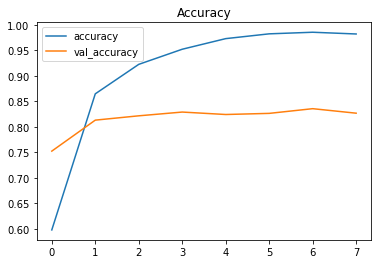

In [16]:
#Acc vs val_acc
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

from the plot, we can see that the <b>accuracy</b> is going up rapidly from <b>39%</b> to <b>98%</b> and meanwhile the <b>validation accuracy</b> is in range of <b>75%</b> to <b>80%</b>

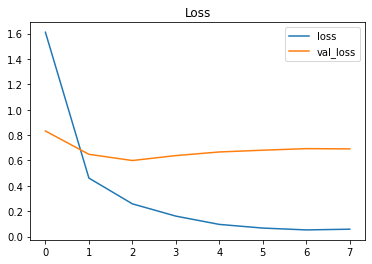

In [17]:
#loss vs val_loss
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

from the plot, we can see that the <b>loss</b> is going down from <b>2.63</b> to <b> 0.05</b> and validation loss is in range <b>0.6</b> to <b>0.8</b>

In [18]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.26351
Test Accuracy: 91.80%


after the evaluation we get the test loss in <b>0.27</b> and accuracy in <b>92%</b>

#### Part 2 : Predict the sample output

In [19]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['hydroplane racing', 'ski jumping', 'disc golf', 'wheelchair basketball', 'rugby']


#### Part 3 : Evaluate with Classification report

The last 2 steps is we evaluate the model with <b>classification report</b> . In this metrics, Build a text report showing the main classification metrics such as <b>precision, recall, f1-score, etc</b>.

You can access the documentation here :
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [20]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                       precision    recall  f1-score   support

           air hockey       0.83      1.00      0.91         5
      ampute football       1.00      1.00      1.00         5
              archery       0.75      0.60      0.67         5
        arm wrestling       1.00      1.00      1.00         5
         axe throwing       1.00      1.00      1.00         5
         balance beam       1.00      1.00      1.00         5
        barell racing       1.00      1.00      1.00         5
             baseball       1.00      0.40      0.57         5
           basketball       1.00      1.00      1.00         5
       baton twirling       0.80      0.80      0.80         5
            bike polo       1.00      0.80      0.89         5
            billiards       1.00      1.00      1.00         5
                  bmx       1.00      1.00      1.00         5
              bobsled       1.00      0.80      0.89         5
              bowling       1.00      1.00      1.00  

#### Part 4 : Last Step!

The last step is we do the same way as the viz before, which is <b>suplot</b> . we do this to compatibility the sync between labels and pictures. 

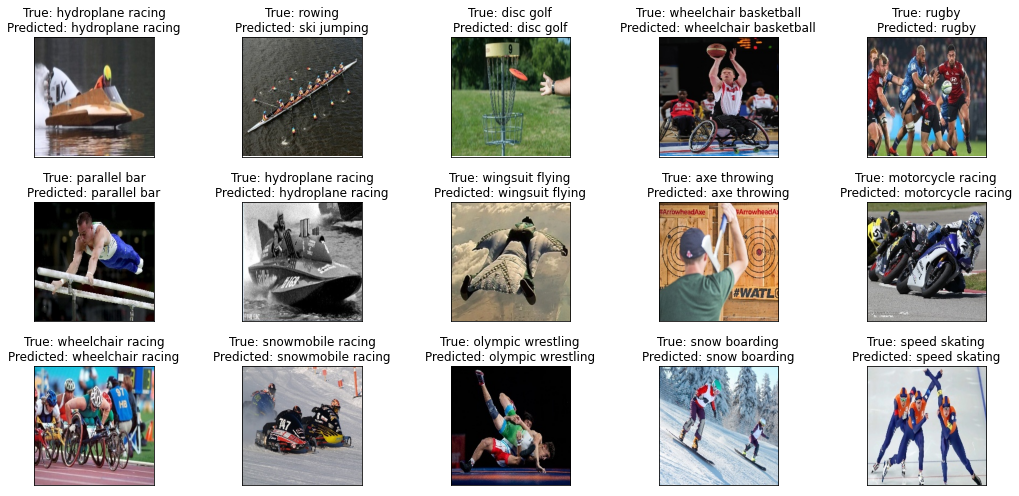

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## Conclusion

With only a simple architecture, this CNN model reached the following metrics tested on unseen data:

- <b>92% classification accuracy</b> : this means the trained model predicts the correct class 92% of the time.
- <b>0.26351 test loss</b> : this means its pretty small that indicates how well this model doing for the dataset.

That's all for my deep learning project this time. sorry if you find errors when you reading it because the author is still in the learning stage. See you in the next project!